# Importação das bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'2.8.2'

# Importação do dataset

In [29]:
dataset = pd.read_csv('/content/Celsius-to-Fahrenheit.csv')
dataset.head()

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [30]:
dataset.shape

(30, 2)

## Transformação do dataset

In [31]:
# Cálculo das temperaturas em Kelvin com base nas temperaturas em Celsius
kelvin_temp = []
for temp in dataset['Celsius'].values:
  kelvin_temp.append(temp + 273.15)

kelvin_temp

[223.14999999999998,
 233.14999999999998,
 243.14999999999998,
 253.14999999999998,
 263.15,
 264.15,
 265.15,
 266.15,
 267.15,
 268.15,
 269.15,
 270.15,
 271.15,
 272.15,
 273.15,
 274.15,
 275.15,
 276.15,
 277.15,
 278.15,
 279.15,
 280.15,
 281.15,
 282.15,
 283.15,
 293.15,
 303.15,
 313.15,
 323.15,
 333.15]

In [32]:
dataset.insert(2, 'Kelvin', kelvin_temp)
dataset.shape

(30, 3)

In [33]:
dataset = dataset.drop('Fahrenheit', axis=1)
dataset.shape

(30, 2)

In [34]:
dataset.head()

,Celsius,Kelvin
0,-50,223.15
1,-40,233.15
2,-30,243.15
3,-20,253.15
4,-10,263.15


## Visualização do dataset

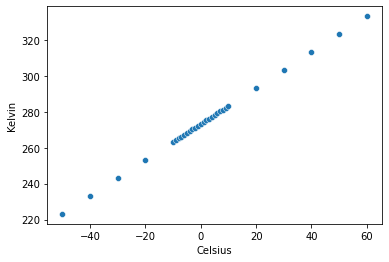

In [35]:
# Gráfico de Dispersão
sns.scatterplot(x = dataset['Celsius'], y = dataset['Kelvin']);

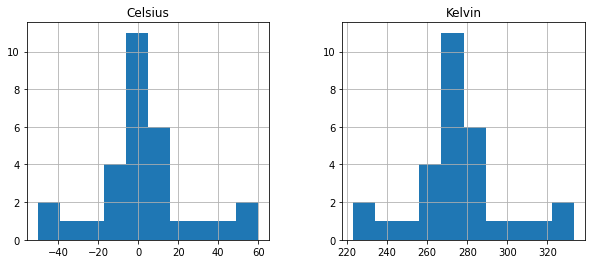

In [36]:
# Histograma
dataset.hist(figsize=(10, 4));

In [37]:
# Análise descritiva do dataset
dataset.describe()

,Celsius,Kelvin
count,30.000000,30.000000
mean,2.000000,275.150000
std,22.780815,22.780815
min,-50.000000,223.150000
25%,-6.750000,266.400000
50%,0.500000,273.650000
75%,7.750000,280.900000
max,60.000000,333.150000


In [38]:
# Informações sobre o dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Celsius  30 non-null     int64  
 1   Kelvin   30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


# Criação e treinamento do Perceptron

## Criação

In [253]:
# Criação de um modelo com camadas sequenciais
perceptron = tf.keras.models.Sequential()
# Adição de uma camada densa de um neurônio
perceptron.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

In [254]:
# Informações sobre o Perceptron
perceptron.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [255]:
# Compilação do Perceptron
perceptron.compile(optimizer=tf.keras.optimizers.Adam(1.1), loss='mean_squared_error')

## Treinamento

In [256]:
# Separando features e labels
x = dataset['Celsius']
y = dataset['Kelvin']

In [257]:
# Treinando o modelo
epochs = perceptron.fit(x, y, epochs=1060)

Epoch 1/1060
1/1 [==============================] - 0s 319ms/step - loss: 79722.5859
Epoch 2/1060
1/1 [==============================] - 0s 8ms/step - loss: 75993.9141
Epoch 3/1060
1/1 [==============================] - 0s 10ms/step - loss: 73538.7109
Epoch 4/1060
1/1 [==============================] - 0s 10ms/step - loss: 72261.3828
Epoch 5/1060
1/1 [==============================] - 0s 15ms/step - loss: 71874.2500
Epoch 6/1060
1/1 [==============================] - 0s 6ms/step - loss: 71885.6719
Epoch 7/1060
1/1 [==============================] - 0s 6ms/step - loss: 71803.1641
Epoch 8/1060
1/1 [==============================] - 0s 7ms/step - loss: 71379.4141
Epoch 9/1060
1/1 [==============================] - 0s 7ms/step - loss: 70624.5000
Epoch 10/1060
1/1 [==============================] - 0s 6ms/step - loss: 69676.0547
Epoch 11/1060
1/1 [==============================] - 0s 6ms/step - loss: 68693.6641
Epoch 12/1060
1/1 [==============================] - 0s 6ms/step - loss: 67804.9

## Visualização do treinamento

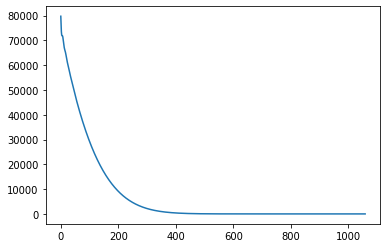

In [258]:
epochs_hist = epochs.history['loss']
plt.plot(epochs_hist);

## Realizando predições

In [259]:
# Consultando os pesos do perceptron
perceptron.get_weights()

[array([[1.0000043]], dtype=float32), array([273.14893], dtype=float32)]

In [260]:
predict = perceptron.predict([0])
correct_result = dataset[dataset['Celsius'] == 0]
correct_result = correct_result['Kelvin'].values

print('Resultado sem formatação de casas decimais')
print('Predição da Rede Neural\t\tResultado Esperado')
print(f'{predict[0][0]}\t\t\t\t{correct_result[0]}')

print('\nResultado com formatação de casas decimais')
print('Predição da Rede Neural\t\tResultado Esperado')
print(f'{predict[0][0]:.2f}\t\t\t\t{correct_result[0]}')

Resultado sem formatação de casas decimais
Predição da Rede Neural		Resultado Esperado
273.14892578125				273.15

Resultado com formatação de casas decimais
Predição da Rede Neural		Resultado Esperado
273.15				273.15
